<a href="https://colab.research.google.com/github/zhihaolaw/SC1015/blob/main/SC1015_mini_project_fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Life_Expectancy_dataset from Google Drive**

---



In [ ]:
#import library
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
life_expectancy_dt = pd.read_csv("gdrive/My Drive/Life_Expectancy_Data.csv")
regions = {
    "Africa": [
        "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
        "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros",
        "Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea",
        "Eritrea", "Swaziland", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea",
        "Guinea-Bissau", "Côte d'Ivoire", "Kenya", "Lesotho", "Liberia", "Libya",
        "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco",
        "Mozambique", "Namibia", "Niger", "Nigeria", "Congo",
        "Rwanda", "São Tomé and Príncipe", "Senegal", "Seychelles", "Sierra Leone",
        "Somalia", "South Africa", "South Sudan", "Sudan", "United Republic of Tanzania", "Togo",
        "Tunisia", "Uganda", "Zambia", "Zimbabwe","Sao Tome and Principe"
    ],
    "Asia": [
        "Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan",
        "Brunei Darussalam", "Cambodia", "China", "Georgia", "India", "Indonesia",
        "Iran (Islamic Republic of)", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan",
        "Kuwait", "Kyrgyzstan", "Lao People's Democratic Republic", "Lebanon", "Malaysia", "Maldives", "Mongolia",
        "Myanmar", "Nepal", "Democratic People's Republic of Korea", "Oman", "Pakistan", "Palestine", "Philippines",
        "Qatar", "Saudi Arabia", "Singapore", "Republic of Korea", "Sri Lanka", "Syrian Arab Republic",
        "Taiwan", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan",
        "United Arab Emirates", "Uzbekistan", "Viet Nam", "Yemen"
    ],
    "Europe": [
        "Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina",
        "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland",
        "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy",
        "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta",
        "Moldova", "Monaco", "Montenegro", "Netherlands", "The former Yugoslav republic of Macedonia", "Norway",
        "Poland", "Portugal", "Romania", "Russian Federation", "San Marino", "Serbia", "Slovakia",
        "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom of Great Britain and Northern Ireland", "Vatican City", "Republic of Moldova"
    ],
    "North America": [
        "Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica",
        "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala",
        "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis",
        "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States of America"
    ],
    "Oceania": [
        "Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia (Federated States of)",
        "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands",
        "Tonga", "Tuvalu", "Vanuatu", "Cook Islands", "Niue"
    ],
    "South America": [
        "Argentina", "Bolivia (Plurinational State of)", "Brazil", "Chile", "Colombia",
        "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela (Bolivarian Republic of)"
    ]
}

dict_cond_values= {key:life_expectancy_dt['Country'].isin(regions[key]) for key in regions}
life_expectancy_dt['Region']=np.select(dict_cond_values.values(),dict_cond_values.keys())
life_expectancy_dt.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Region
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia


# **Data Exploration and Analysis**

---



In [ ]:
life_expectancy_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
#life_expectancy_dt = pd.read_csv("gdrive/My Drive/Life_Expectancy_Data.csv")
#life_expectancy_dt.head()
#life_expectancy_dt.info()
#life_expectancy_dt['Country'].unique()

life_expectancy_dt = life_expectancy_dt.rename(columns=lambda x: x.upper().replace(' ', '_').replace('-', '_'))
#print(country)
#print(life_expectancy_dt)
life_expectancy_dt.head()

,COUNTRY,YEAR,STATUS,LIFE_EXPECTANCY_,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES_,...,TOTAL_EXPENDITURE,DIPHTHERIA_,_HIV/AIDS,GDP,POPULATION,_THINNESS__1_19_YEARS,_THINNESS_5_9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING,REGION
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,Asia
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Asia
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Asia
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Asia
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Asia


In [ ]:
life_expectancy_dt['REGION'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [ ]:
import pandas as pd

df = pd.DataFrame(life_expectancy_dt)

# Filtering the DataFrame to get rows where the Region is '0'
region_0_df = life_expectancy_dt[life_expectancy_dt['REGION'] == '0']

# Getting the 'Value' column from the filtered DataFrame
values_in_region_0 = region_0_df['COUNTRY'].tolist()
print(values_in_region_0)

country_occurrences_in_region_0 = region_0_df['COUNTRY'].value_counts()
print(country_occurrences_in_region_0)

[]
Series([], Name: count, dtype: int64)


In [ ]:
life_expectancy_dt.isna().sum()

COUNTRY                              0
YEAR                                 0
STATUS                               0
LIFE_EXPECTANCY_                    10
ADULT_MORTALITY                     10
INFANT_DEATHS                        0
ALCOHOL                            194
PERCENTAGE_EXPENDITURE               0
HEPATITIS_B                        553
MEASLES_                             0
_BMI_                               34
UNDER_FIVE_DEATHS_                   0
POLIO                               19
TOTAL_EXPENDITURE                  226
DIPHTHERIA_                         19
_HIV/AIDS                            0
GDP                                448
POPULATION                         652
_THINNESS__1_19_YEARS               34
_THINNESS_5_9_YEARS                 34
INCOME_COMPOSITION_OF_RESOURCES    167
SCHOOLING                          163
REGION                               0
dtype: int64

In [ ]:
life_expectancy_dt.describe()

,YEAR,LIFE_EXPECTANCY_,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES_,_BMI_,UNDER_FIVE_DEATHS_,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA_,_HIV/AIDS,GDP,POPULATION,_THINNESS__1_19_YEARS,_THINNESS_5_9_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<Axes: >

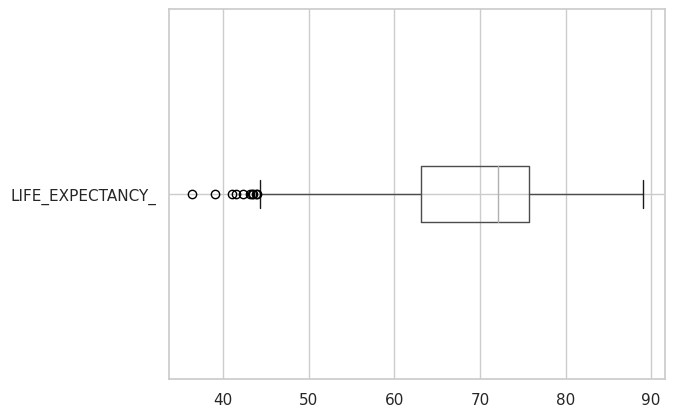

In [ ]:
life_expectancy_dt.boxplot(['LIFE_EXPECTANCY_'], vert = 0)

In [ ]:
life_expectancy_dt.nunique()

COUNTRY                             193
YEAR                                 16
STATUS                                2
LIFE_EXPECTANCY_                    362
ADULT_MORTALITY                     425
INFANT_DEATHS                       209
ALCOHOL                            1076
PERCENTAGE_EXPENDITURE             2328
HEPATITIS_B                          87
MEASLES_                            958
_BMI_                               608
UNDER_FIVE_DEATHS_                  252
POLIO                                73
TOTAL_EXPENDITURE                   818
DIPHTHERIA_                          81
_HIV/AIDS                           200
GDP                                2490
POPULATION                         2278
_THINNESS__1_19_YEARS               200
_THINNESS_5_9_YEARS                 207
INCOME_COMPOSITION_OF_RESOURCES     625
SCHOOLING                           173
REGION                                6
dtype: int64

In [ ]:
percentage_of_Null_value = life_expectancy_dt.isnull().sum() * 100 / len(life_expectancy_dt)
print("Percentage of null value in each column:\n", round(percentage_of_Null_value,2))

Percentage of null value in each column:
 COUNTRY                             0.00
YEAR                                0.00
STATUS                              0.00
LIFE_EXPECTANCY_                    0.34
ADULT_MORTALITY                     0.34
INFANT_DEATHS                       0.00
ALCOHOL                             6.60
PERCENTAGE_EXPENDITURE              0.00
HEPATITIS_B                        18.82
MEASLES_                            0.00
_BMI_                               1.16
UNDER_FIVE_DEATHS_                  0.00
POLIO                               0.65
TOTAL_EXPENDITURE                   7.69
DIPHTHERIA_                         0.65
_HIV/AIDS                           0.00
GDP                                15.25
POPULATION                         22.19
_THINNESS__1_19_YEARS               1.16
_THINNESS_5_9_YEARS                 1.16
INCOME_COMPOSITION_OF_RESOURCES     5.68
SCHOOLING                           5.55
REGION                              0.00
dtype: float64


## **Data Cleaning (remove null value with KNNImputer)**



In [ ]:
# Identify columns with missing values
missing_columns = life_expectancy_dt.columns[life_expectancy_dt.isnull().any()].tolist()

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Impute missing values
life_expectancy_dt[missing_columns] = imputer.fit_transform(life_expectancy_dt[missing_columns])

Comments:

**KNNImputer** is a technique used to impute (or fill in) missing values in a dataset by using the k-nearest neighbors algorithm.:

1. **Handling Missing Values**: Many real-world datasets contain missing values due to various reasons such as data collection errors, sensor failures, or simply incomplete information. These missing values can pose challenges for data analysis and modeling, as many machine learning algorithms cannot handle missing data directly.

2. **K-Nearest Neighbors (KNN) Algorithm**: KNNImputer utilizes the k-nearest neighbors algorithm to impute missing values. The basic idea behind KNN is to impute the missing value of a data point by averaging the values of its k nearest neighbors. The "nearest" neighbors are determined based on a distance metric, often Euclidean distance, and can be weighted or unweighted based on their proximity to the target point.

3. **Preserving Data Structure**: One of the advantages of using KNNImputer is that it preserves the underlying structure of the data. Instead of relying solely on summary statistics like the mean or median to impute missing values, KNNImputer considers the relationships between data points. This can be particularly beneficial in datasets where observations are not independent and where there may be complex patterns or correlations among variables.

4. **Non-parametric Approach**: KNNImputer is a non-parametric approach to imputation, meaning it does not make assumptions about the distribution of the data. This can be advantageous in datasets where the distribution of variables is not known or is highly skewed, as traditional imputation methods like mean or median imputation may not be appropriate.

5. **Suitability for Multivariate Imputation**: KNNImputer can also be used for multivariate imputation, where missing values in multiple variables are imputed simultaneously. This allows for the consideration of relationships between variables when imputing missing values, potentially leading to more accurate imputations compared to univariate methods.

6. **Parameter Tuning**: The choice of the number of nearest neighbors (k) is a hyperparameter in KNNImputer that needs to be tuned based on the dataset and the specific context. Selecting an appropriate value of k is crucial as it can affect the imputation accuracy and computational efficiency of the algorithm.

Overall, KNNImputer is a versatile and effective technique for imputing missing values in a dataset, particularly when the underlying relationships between variables are important and when the data distribution is not well-known.

However, it's important to be mindful of its computational complexity, especially for large datasets, and to validate the imputed values to ensure they are reasonable and do not introduce bias into subsequent analyses.

In [ ]:
percentage_of_Null_value = life_expectancy_dt.isnull().sum() * 100 / len(life_expectancy_dt)
print("Percentage of null value in each column after KNNImputer:\n", round(percentage_of_Null_value,2))

Percentage of null value in each column after KNNImputer:
 COUNTRY                            0.0
YEAR                               0.0
STATUS                             0.0
LIFE_EXPECTANCY_                   0.0
ADULT_MORTALITY                    0.0
INFANT_DEATHS                      0.0
ALCOHOL                            0.0
PERCENTAGE_EXPENDITURE             0.0
HEPATITIS_B                        0.0
MEASLES_                           0.0
_BMI_                              0.0
UNDER_FIVE_DEATHS_                 0.0
POLIO                              0.0
TOTAL_EXPENDITURE                  0.0
DIPHTHERIA_                        0.0
_HIV/AIDS                          0.0
GDP                                0.0
POPULATION                         0.0
_THINNESS__1_19_YEARS              0.0
_THINNESS_5_9_YEARS                0.0
INCOME_COMPOSITION_OF_RESOURCES    0.0
SCHOOLING                          0.0
REGION                             0.0
dtype: float64


In [ ]:
life_expectancy_dt['LIFESPAN'] = life_expectancy_dt['LIFE_EXPECTANCY_'].apply(lambda x: 'High' if x >= 70 else 'Low')
#df['LIFESPAN'].info()
life_expectancy_dt['LIFESPAN'].describe()

count     2938
unique       2
top       High
freq      1634
Name: LIFESPAN, dtype: object

## **Correlation Plot**

<Axes: >

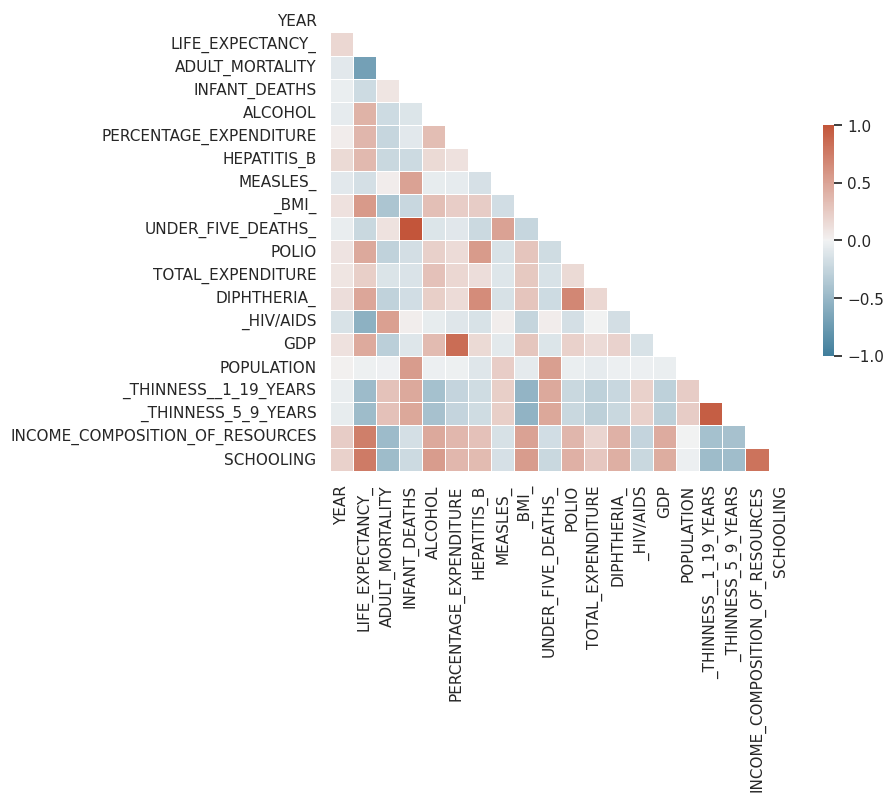

In [ ]:
sns.set_theme(style="white")

# Generate a large random dataset with synthetic nature (categorical + numerical)
#data = sns.load_dataset("titanic")
#df = pd.DataFrame(data=data)

# Generate label column randomly '0' or '1'
#df['label'] = np.random.randint(0,2, size=len(df))

# Compute the correlation matrix
corr = life_expectancy_dt.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1.0, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

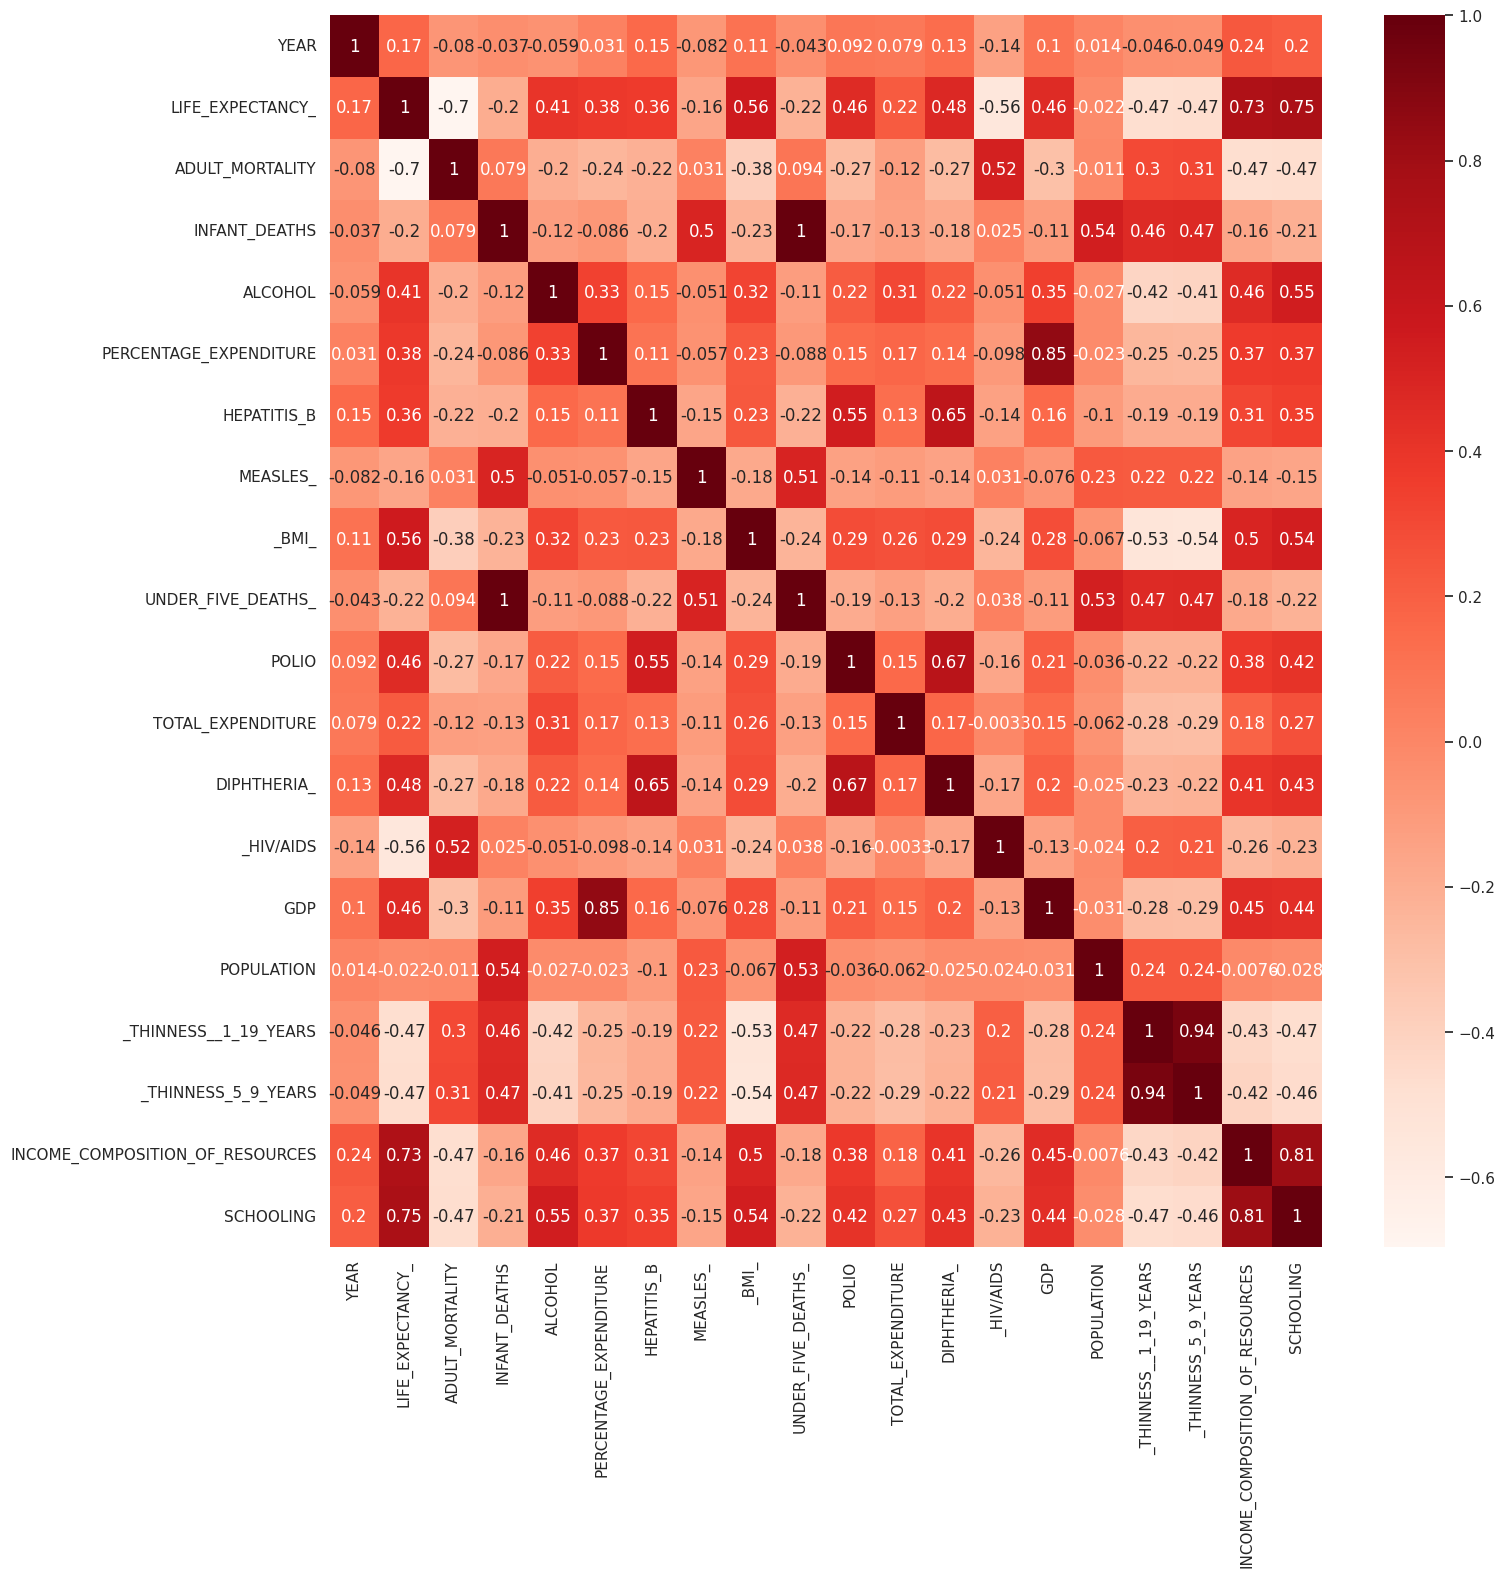

In [ ]:
plt.figure(figsize=(16,16))
cor = life_expectancy_dt.corr(numeric_only=True)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

Comments:
* There is a high correlation between thinness 1-19 years and thinnes 5-9 years
* There is a high correlation between under-five deaths and infant deaths
* There is a high correlation between Income composition of resources and Schooling
* There is a high correlation between Diphtheria and Polio

* correlation score between these variables and life expectancy:
 * "INCOME_COMPOSITION_OF_RESOURCES" => 0.73
 * "SCHOOLING" => 0.75
 * "ADULT_MORTALITY" => -0.7
 * "_BMI_" => 0.56
 * "GDP" => 0.46
 * "POPULATION" => -0.022
 * "PERCENTAGE_EXPENDITURE" => 0.38
 * "ALCOHOL" => 0.41
 * "MEASLES_" => -0.16
 * "YEAR" => 0.17

## **Select KBest Feature**

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#import pandas as pd

# Define your features (X) and target variable (Y)
X = life_expectancy_dt[["INCOME_COMPOSITION_OF_RESOURCES", "SCHOOLING", "ADULT_MORTALITY", "_BMI_", "GDP", "POPULATION", "PERCENTAGE_EXPENDITURE", "ALCOHOL", "MEASLES_", "YEAR"]]
Y = life_expectancy_dt["LIFE_EXPECTANCY_"]

# Initialize SelectKBest with f_regression scoring function and k=5
KBest = SelectKBest(score_func=f_regression, k=5)

# Fit SelectKBest to your data
KBest.fit(X, Y)

# Create a DataFrame to display the scores and p-values
KBest_scores = pd.DataFrame({'features': X.columns, 'Score': KBest.scores_, 'pValue': KBest.pvalues_ })

print(KBest_scores)

                          features        Score         pValue
0  INCOME_COMPOSITION_OF_RESOURCES  3421.192329   0.000000e+00
1                        SCHOOLING  3884.420729   0.000000e+00
2                  ADULT_MORTALITY  2764.459130   0.000000e+00
3                            _BMI_  1339.528618  6.202281e-242
4                              GDP   782.504434  7.432354e-153
5                       POPULATION     1.428480   2.321091e-01
6           PERCENTAGE_EXPENDITURE   499.280842  2.879206e-102
7                          ALCOHOL   578.745329  7.123194e-117
8                         MEASLES_    74.658751   9.035219e-18
9                             YEAR    86.985040   2.086918e-20


Comments:

**"SelectKBest"** is a method used to choose the top 'k' features that are most informative for a particular task. This method is often employed in machine learning to reduce the dimensionality of the feature space and improve the performance and efficiency of models.

* **Feature Score:** Feature score refers to a metric that quantifies the importance or relevance of each feature in the dataset. The specific scoring function used depends on the algorithm or method employed for feature selection. Common scoring functions include chi-squared, ANOVA F-value, mutual information, etc. The feature scores are calculated based on how well each feature correlates with the target variable or how much information it provides about the target.

* **P-value:** In statistics, the p-value is a measure that helps determine the significance of an observed result. In the context of feature selection, the p-value often comes into play when using statistical tests such as ANOVA (Analysis of Variance) to evaluate the relationship between features and the target variable. A low p-value suggests that the relationship between the feature and the target variable is statistically significant, indicating that the feature is likely to be informative for prediction.

Hence our team decide to choose "INCOME_COMPOSITION_OF_RESOURCES", "SCHOOLING", "ADULT_MORTALITY", "_BMI_", "GDP" for anaysis.

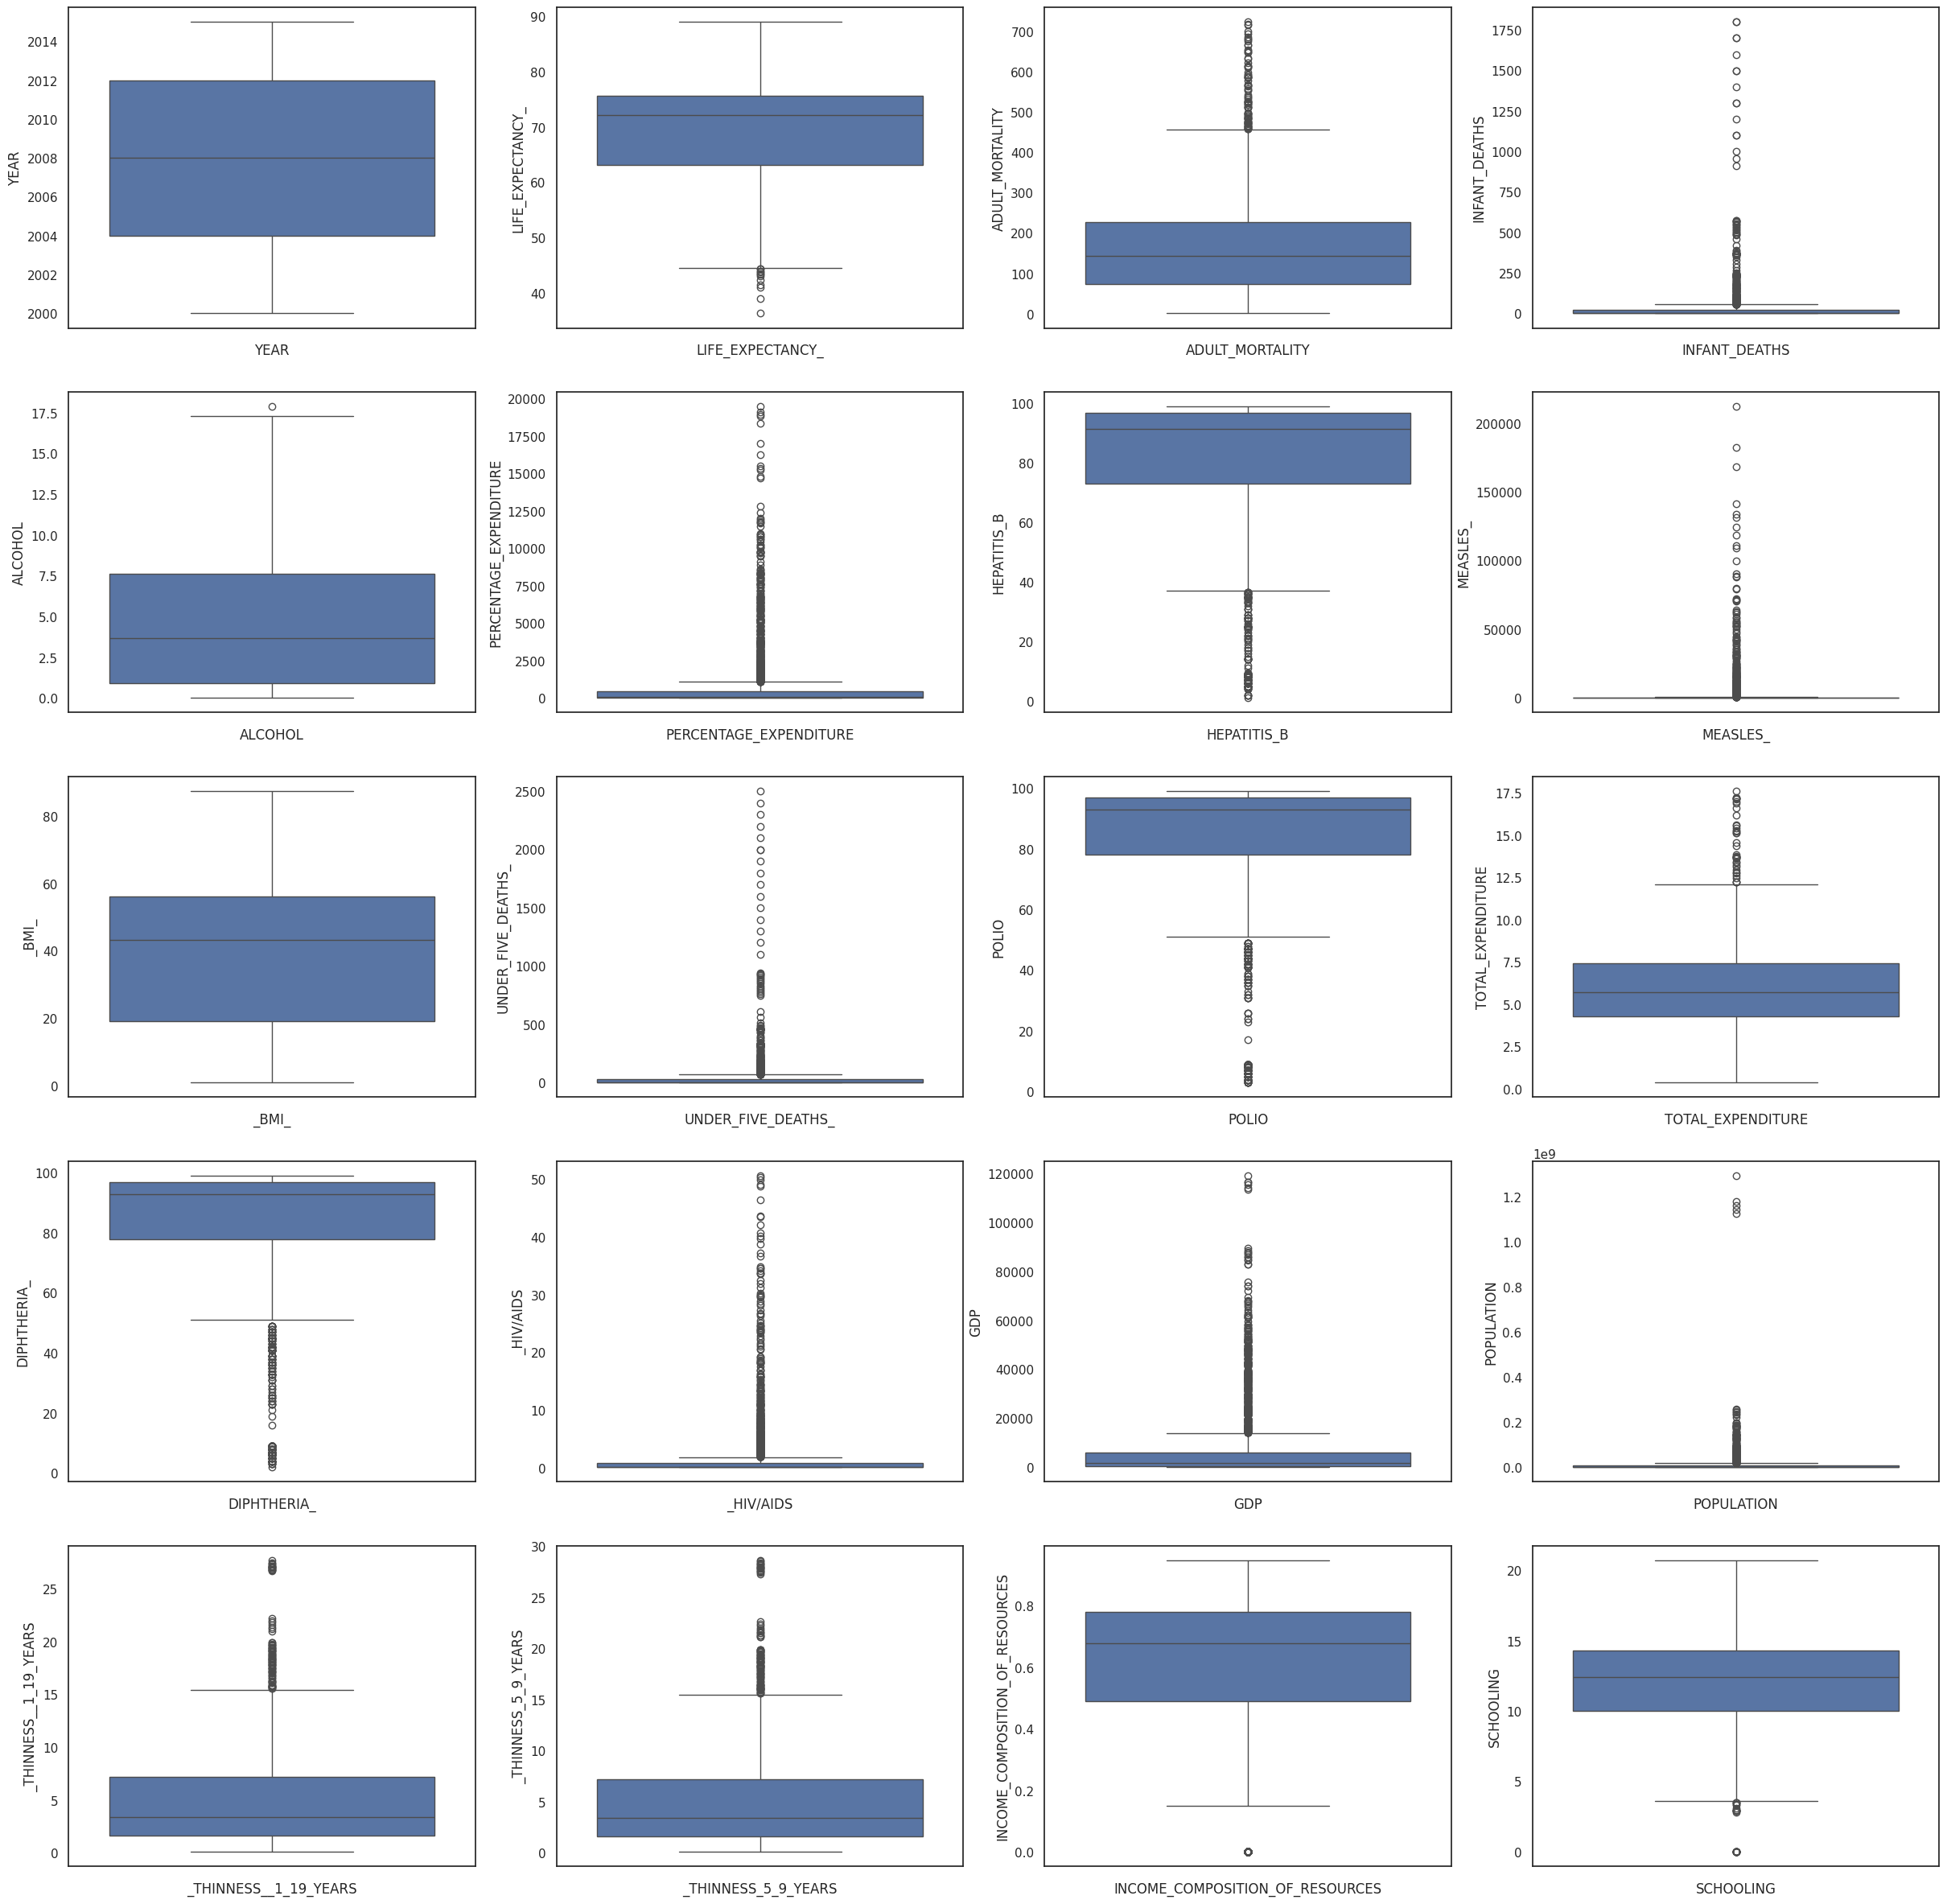

In [ ]:
categorical_columns = []
numerical_columns =[]

for col in life_expectancy_dt.columns:
    if life_expectancy_dt[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

#print(categorical_columns)
#print(numerical_columns)

fig = plt.figure(figsize=(30,30))

counter = 0

for col in numerical_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.boxplot(data=life_expectancy_dt[col])
    plt.xlabel(col)
    counter = counter + 1

In [ ]:
#plot histogram to see the distribution of dataset based on each variable

## **Detect Outlier (replace with mean, median or remove outlier from dataset)**

In [ ]:
# Function to detect outliers using IQR approach
def detect_outliers(data_column):
    """
    Calculates IQR and identifies outliers.

    Args:
        data_column (pd.Series): The data column to analyze.

    Returns:
        list: A list of outliers.
    """

    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data_column[(data_column < lower_bound) | (data_column > upper_bound)]
    return outliers.tolist()

# Calculate and store outlier counts and percentages
outlier_data = {}
for col in numerical_columns:
    outliers = detect_outliers(life_expectancy_dt[col])
    outlier_counts = len(outliers)
    outlier_percentages = (outlier_counts / len(life_expectancy_dt[col])) * 100  # Calculate percentage
    outlier_data[col] = {'count': outlier_counts, 'percentage': outlier_percentages}

    #print(col)
    print(col,"->", "No. of IQR-based outliers:", outlier_counts)
    print("--------------------------------")

YEAR -> No. of IQR-based outliers: 0
--------------------------------
LIFE_EXPECTANCY_ -> No. of IQR-based outliers: 12
--------------------------------
ADULT_MORTALITY -> No. of IQR-based outliers: 85
--------------------------------
INFANT_DEATHS -> No. of IQR-based outliers: 315
--------------------------------
ALCOHOL -> No. of IQR-based outliers: 1
--------------------------------
PERCENTAGE_EXPENDITURE -> No. of IQR-based outliers: 389
--------------------------------
HEPATITIS_B -> No. of IQR-based outliers: 263
--------------------------------
MEASLES_ -> No. of IQR-based outliers: 542
--------------------------------
_BMI_ -> No. of IQR-based outliers: 0
--------------------------------
UNDER_FIVE_DEATHS_ -> No. of IQR-based outliers: 394
--------------------------------
POLIO -> No. of IQR-based outliers: 281
--------------------------------
TOTAL_EXPENDITURE -> No. of IQR-based outliers: 39
--------------------------------
DIPHTHERIA_ -> No. of IQR-based outliers: 300
------

In [ ]:
# @title Replace outlier with median (method 1) { display-mode: "both" }
# Replace outliers with column means (handle missing values appropriately)
#for col in numerical_columns:
#    outliers = detect_outliers(life_expectancy_dt[col])
#    if outliers:  # Check if there are outliers before replacing
#        median_value = life_expectancy_dt[col].median()  # Calculate median (consider handling missing values)
#        life_expectancy_dt.loc[life_expectancy_dt[col].isin(outliers), col] = median_value  # Replace outliers with mean

In [ ]:
# @title Remove outlier (method 2) { display-mode: "both" }
#for col in numerical_columns:
    # Handling missing values
#    life_expectancy_dt[col].fillna(life_expectancy_dt[col].mean(), inplace=True)

    # Detecting outliers
#    outliers = detect_outliers(life_expectancy_dt[col])

#    if outliers:  # Check if there are outliers before replacing
        # Removing outliers from the DataFrame
#        life_expectancy_dt = life_expectancy_dt[~life_expectancy_dt[col].isin(outliers)]

In [ ]:
# @title Replace outlier with mean (the method we use for our mini-project) { display-mode: "both" }
# Replace outliers with column means (handle missing values appropriately)
for col in numerical_columns:
    outliers = detect_outliers(life_expectancy_dt[col])
    if outliers:  # Check if there are outliers before replacing
        mean_value = life_expectancy_dt[col].mean()  # Calculate mean (consider handling missing values)
        life_expectancy_dt.loc[life_expectancy_dt[col].isin(outliers), col] = mean_value  # Replace outliers with mean

Comments:

The reason for using mean to replace the outlier in our mini project
 * Mean as a Measure of Central Tendency: The mean is often used as a measure of central tendency, representing the average value of the data. In the context of life expectancy, it provides a summary statistic that reflects the typical value of life expectancy across the dataset.
 * Preservation of Data Distribution: Replacing outliers with the mean helps preserve the overall distribution of the data. This is important for maintaining the integrity of the dataset and ensuring that subsequent analyses accurately reflect the underlying patterns and trends in life expectancy.

In [ ]:
life_expectancy_dt.skew(numeric_only=True)

YEAR                              -0.006409
LIFE_EXPECTANCY_                  -0.607923
ADULT_MORTALITY                    0.649321
INFANT_DEATHS                      1.210452
ALCOHOL                            0.596033
PERCENTAGE_EXPENDITURE             1.033098
HEPATITIS_B                       -1.344295
MEASLES_                           1.531992
_BMI_                             -0.214131
UNDER_FIVE_DEATHS_                 1.076820
POLIO                             -1.273696
TOTAL_EXPENDITURE                  0.216567
DIPHTHERIA_                       -1.232900
_HIV/AIDS                          1.183418
GDP                                1.006296
POPULATION                         1.030752
_THINNESS__1_19_YEARS              0.977097
_THINNESS_5_9_YEARS                0.948826
INCOME_COMPOSITION_OF_RESOURCES   -0.376343
SCHOOLING                         -0.255232
dtype: float64

# **Data Visualization**

---



Text(0, 0.5, 'Life Expectancy')

<Figure size 1600x600 with 0 Axes>

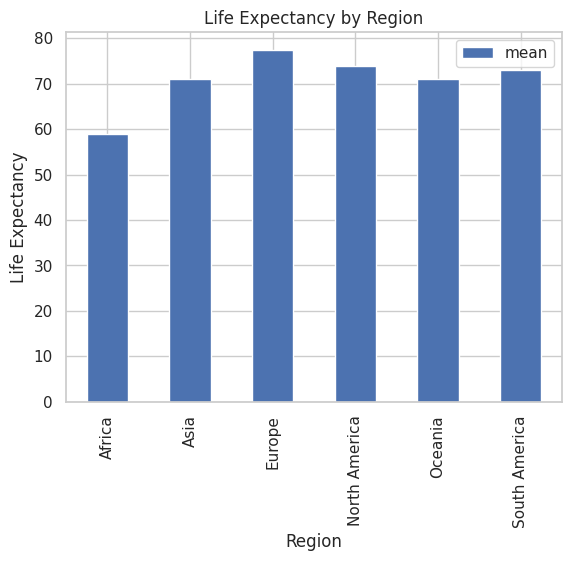

In [ ]:
region = life_expectancy_dt["REGION"]
life_expectancy = life_expectancy_dt["LIFE_EXPECTANCY_"]

# Set style
sns.set(style="whitegrid")
# Create barplot
plt.figure(figsize=(16, 6))
ptsbyyear = life_expectancy_dt.groupby("REGION").agg({'LIFE_EXPECTANCY_': ['mean']}).reset_index()
ptsbyyear.plot(kind="bar", x="REGION", y="LIFE_EXPECTANCY_")
plt.title('Life Expectancy by Region')
plt.xlabel('Region')
plt.ylabel('Life Expectancy')

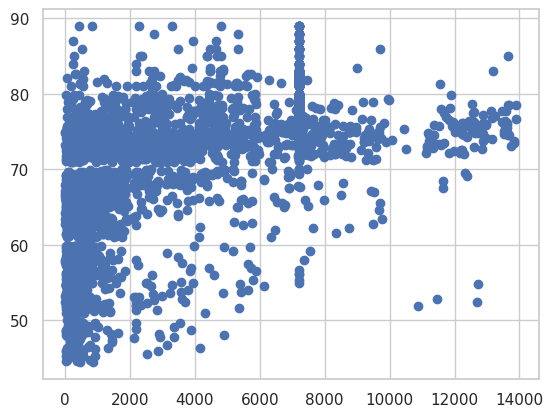

In [ ]:
gdp = plt.scatter(x="GDP", y="LIFE_EXPECTANCY_",data=life_expectancy_dt)
plt.xticks()
plt.show()

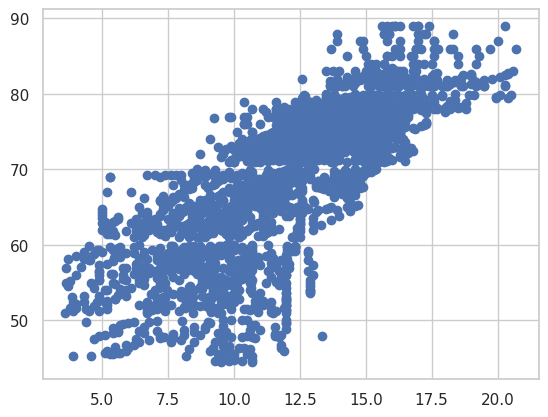

In [ ]:
schooling = plt.scatter(x="SCHOOLING", y="LIFE_EXPECTANCY_",data=life_expectancy_dt)
plt.xticks()
plt.show()

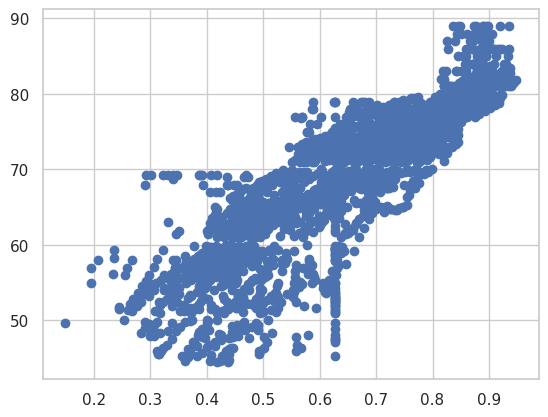

In [ ]:
income = plt.scatter(x="INCOME_COMPOSITION_OF_RESOURCES", y="LIFE_EXPECTANCY_",data=life_expectancy_dt)
plt.xticks()
plt.show()

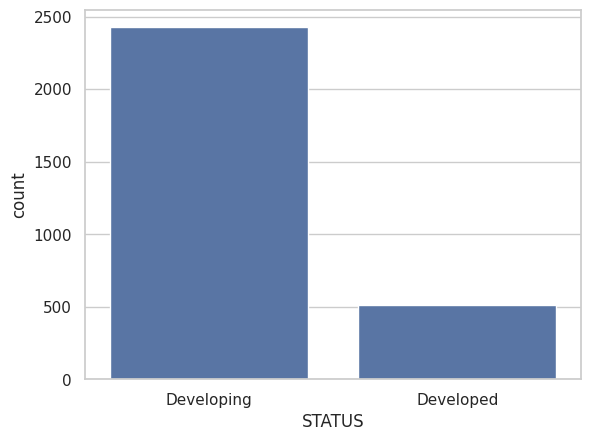

In [ ]:
g = sns.countplot(x="STATUS",data=life_expectancy_dt)
plt.xticks()
plt.show()

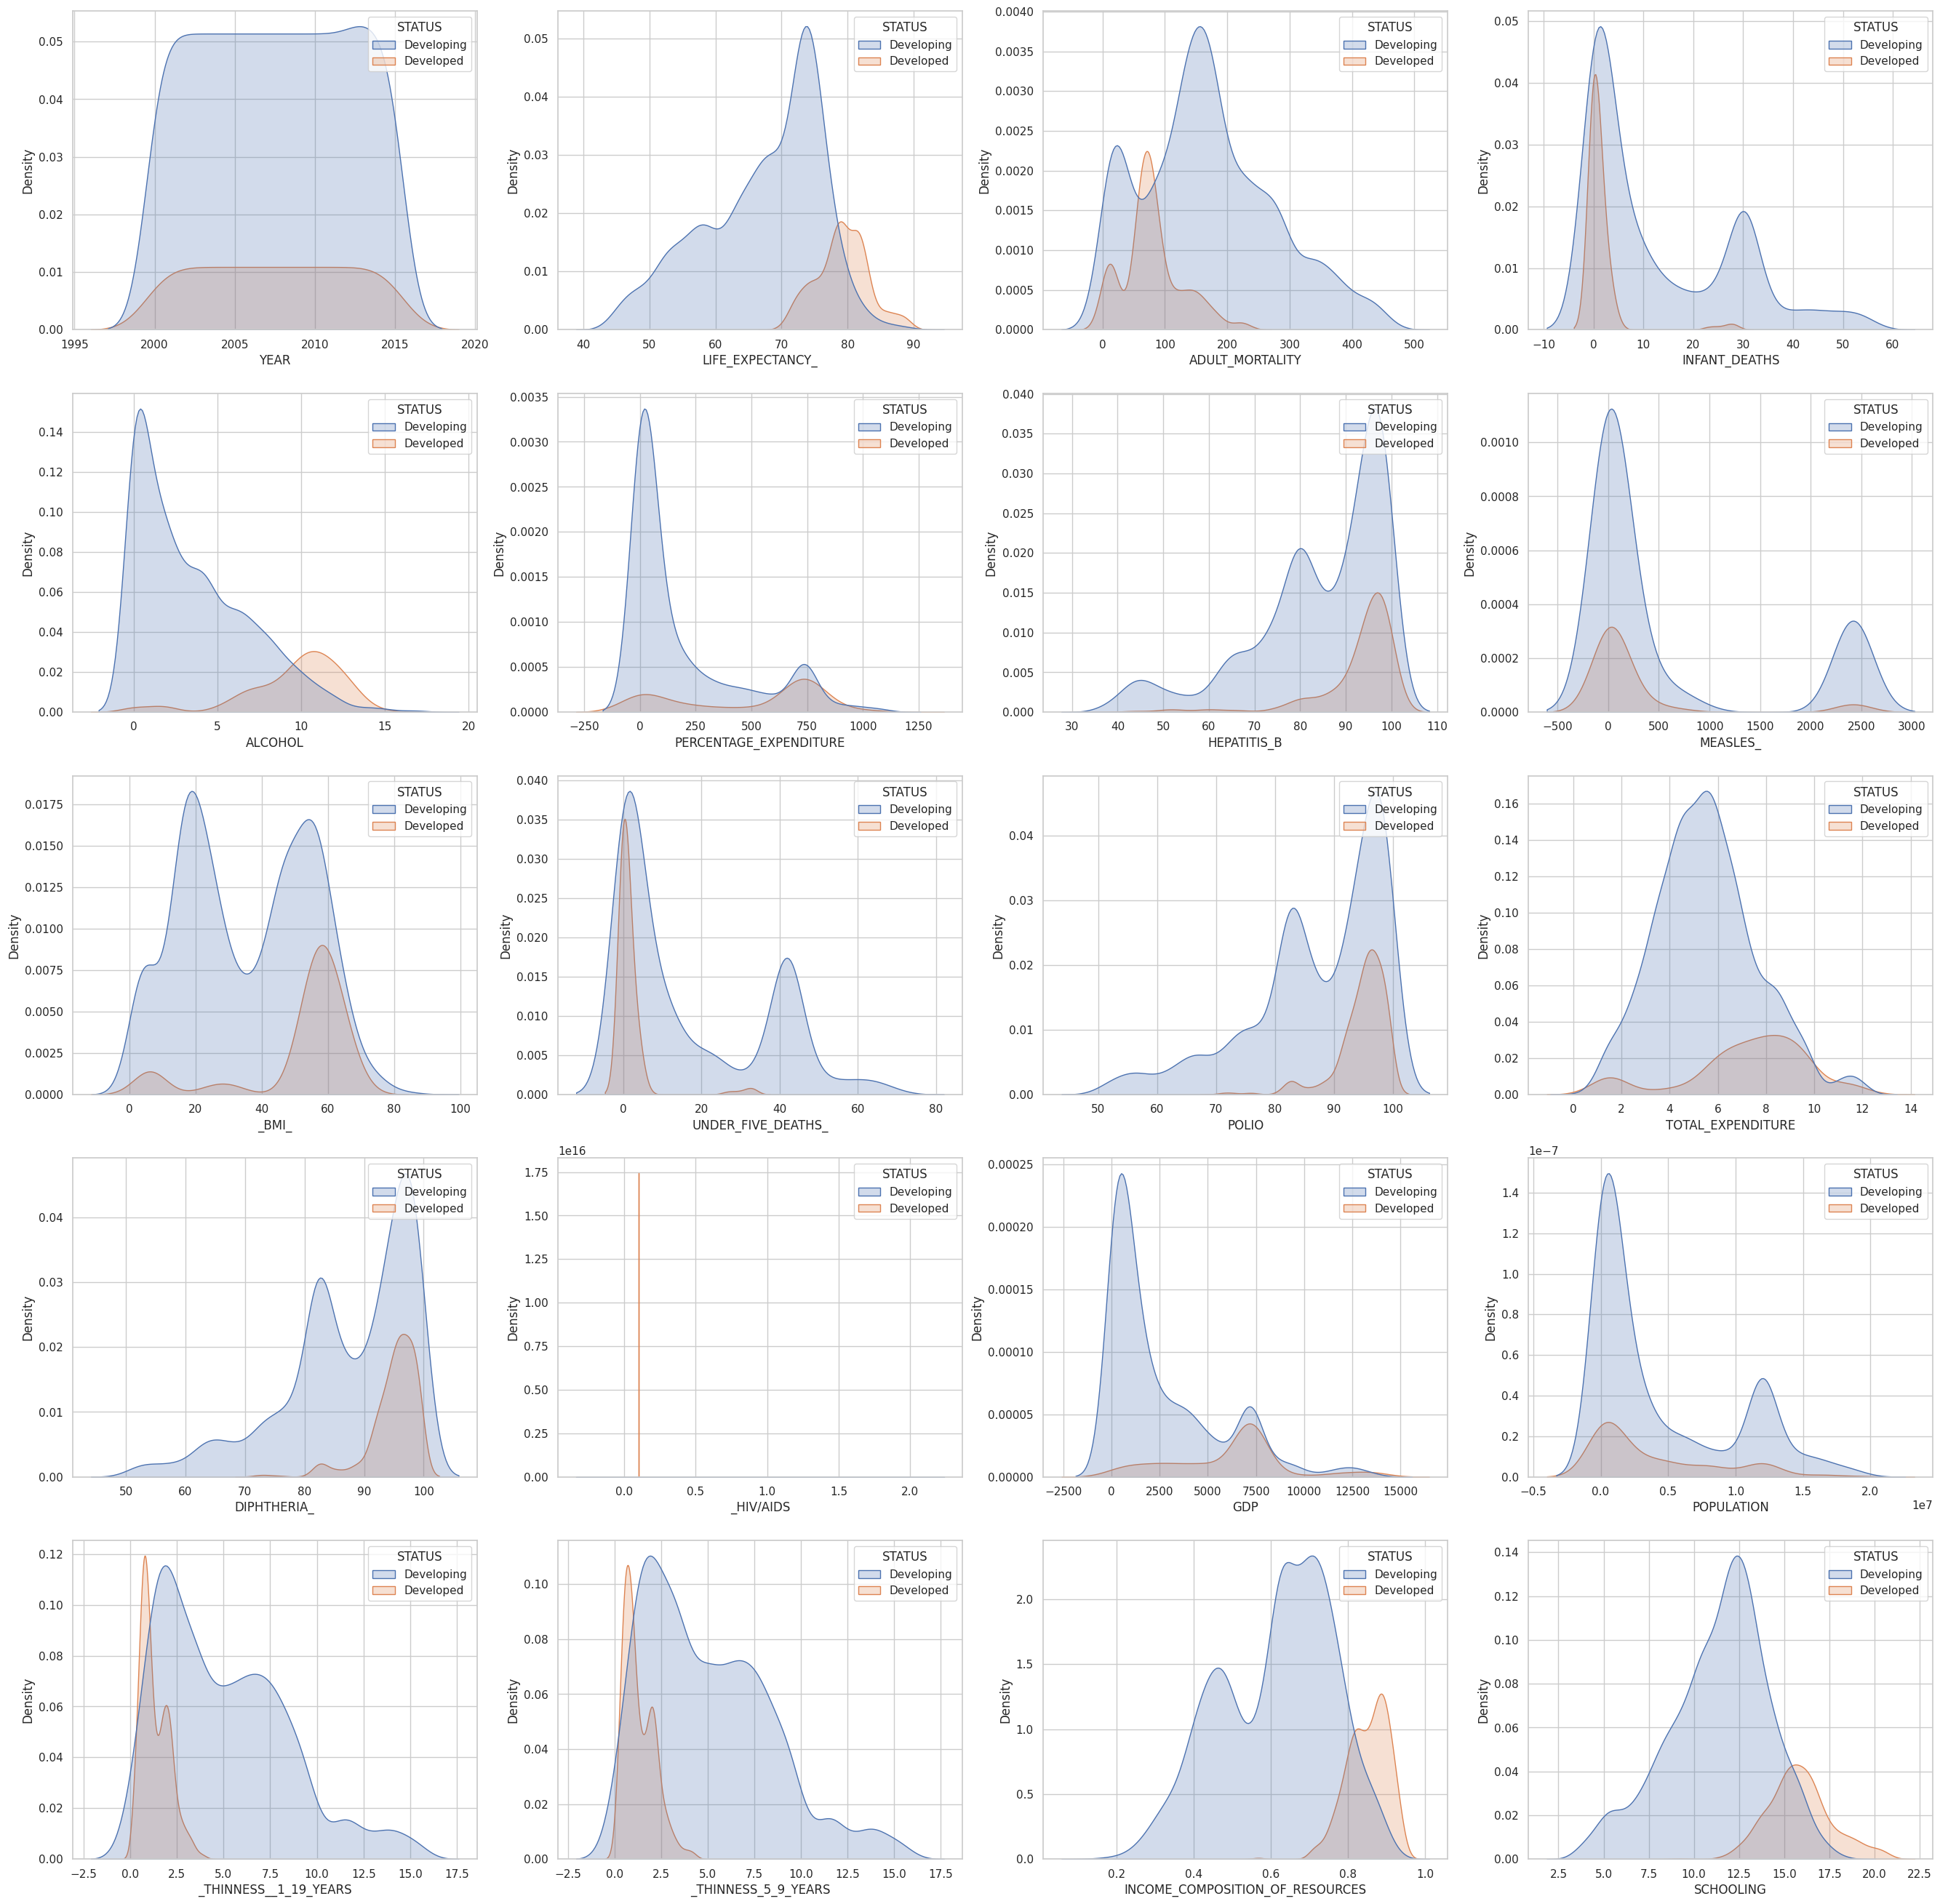

In [ ]:
fig = plt.figure(figsize=(33,33))

counter = 0

for col in numerical_columns:
    sub = fig.add_subplot(5,4,counter+1)
    g = sns.kdeplot(x=col,data=life_expectancy_dt,fill=True,hue="STATUS")
    plt.xticks()
    counter = counter + 1

# **Machine Learning Model**

---



## **Linear Regression Model**

In [ ]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Intercept of Regression 	: b =  [77.60023672]
Coefficients of Regression 	: a =  [[-0.05392817]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.36091828025253025
Mean Squared Error (MSE) 	: 55.396995274180476

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3872198777389356
Mean Squared Error (MSE) 	: 55.5881736245889



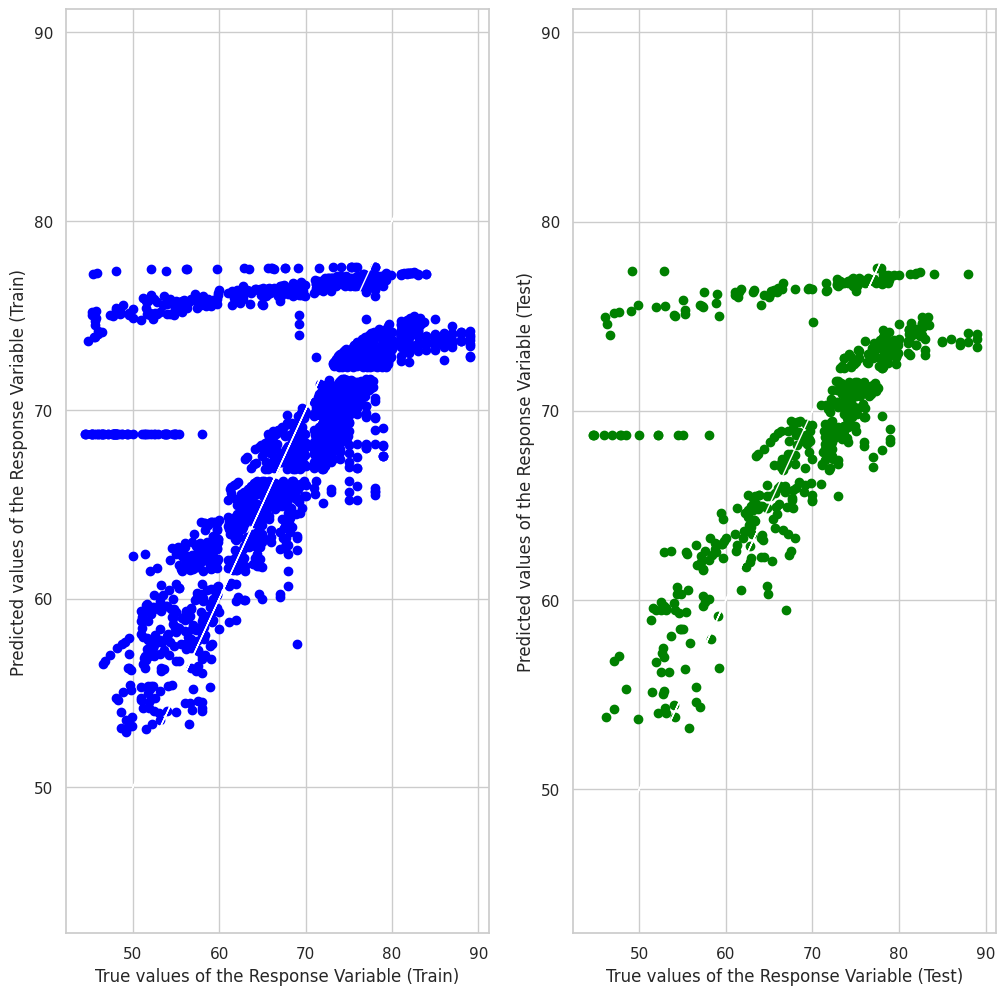

In [ ]:
#life_expectancy_dt, adult_mortality
lifeExpectancy = pd.DataFrame(life_expectancy_dt['LIFE_EXPECTANCY_'])  # Response
adultMortality = pd.DataFrame(life_expectancy_dt['ADULT_MORTALITY'])        # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(adultMortality, lifeExpectancy, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [36.39620794]
Coefficients of Regression 	: a =  [[50.12372688]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7471863164539925
Mean Squared Error (MSE) 	: 21.98110761477859

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7332802327739874
Mean Squared Error (MSE) 	: 23.82574184325365



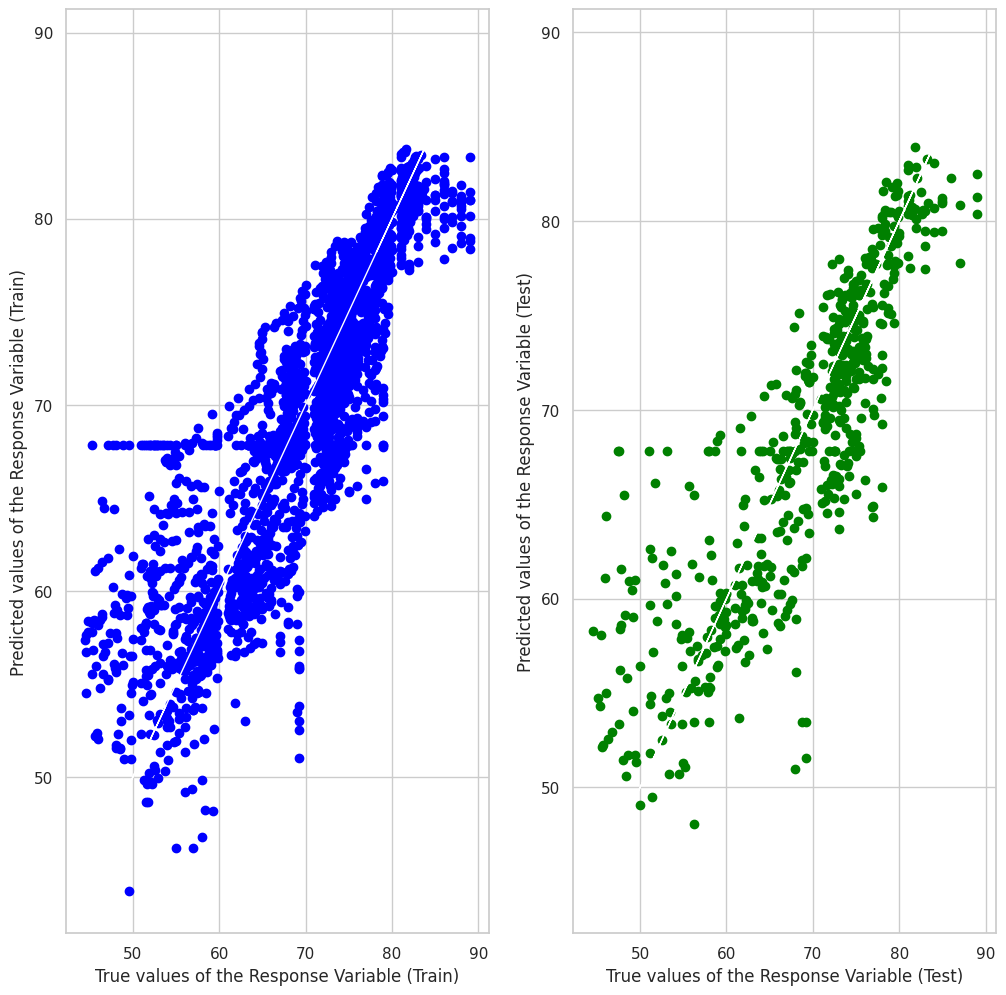

In [ ]:
#life_expectancy_dt, adult_mortality
lifeExpectancy = pd.DataFrame(life_expectancy_dt['LIFE_EXPECTANCY_'])  # Response
incomeComposition = pd.DataFrame(life_expectancy_dt['INCOME_COMPOSITION_OF_RESOURCES'])        # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(incomeComposition, lifeExpectancy, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Intercept of Regression 	: b =  [40.98185447]
Coefficients of Regression 	: a =  [[2.33200968]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5958669864457526
Mean Squared Error (MSE) 	: 35.923591330414304

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6105128090783308
Mean Squared Error (MSE) 	: 31.729018711477966



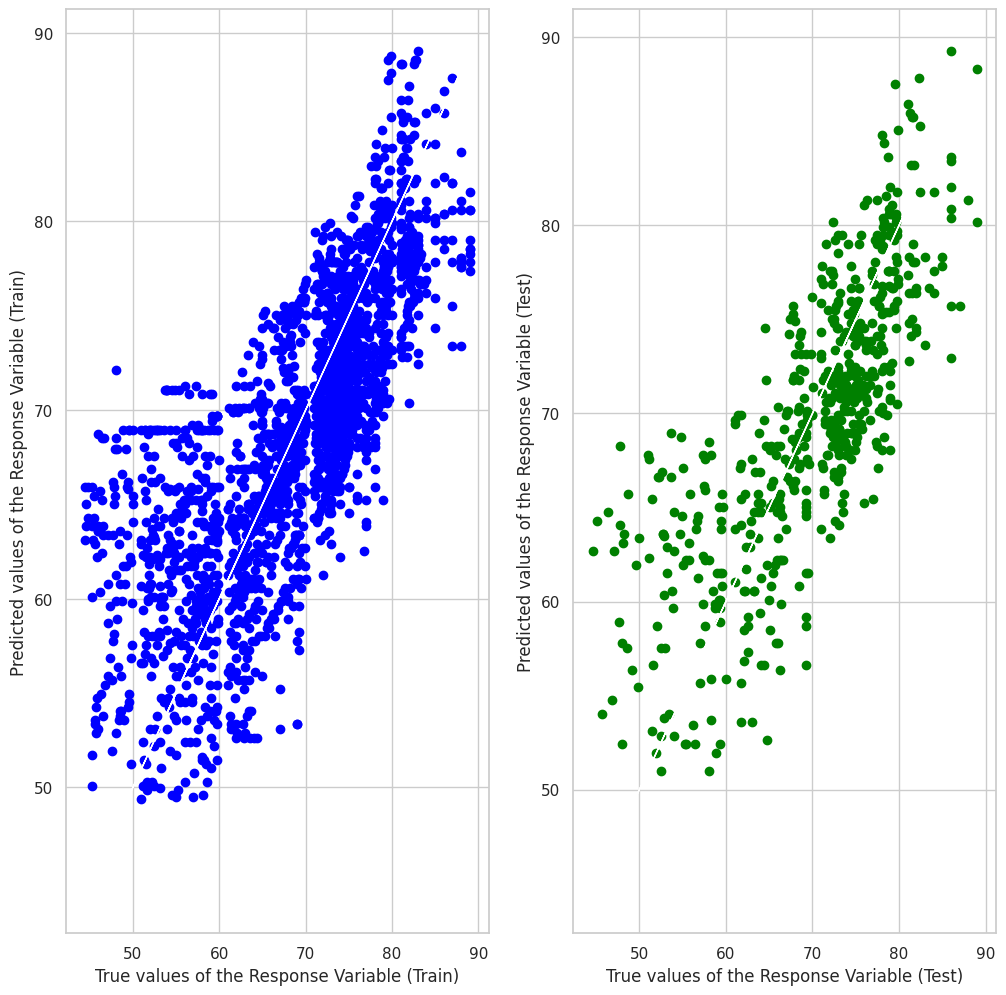

In [ ]:
life_expectancy_dt
#life_expectancy_dt, adult_mortality
lifeExpectancy = pd.DataFrame(life_expectancy_dt['LIFE_EXPECTANCY_'])  # Response
schooling = pd.DataFrame(life_expectancy_dt['SCHOOLING'])        # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(schooling, lifeExpectancy, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(12, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## **Clustering Model (KMeans)**

---



In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


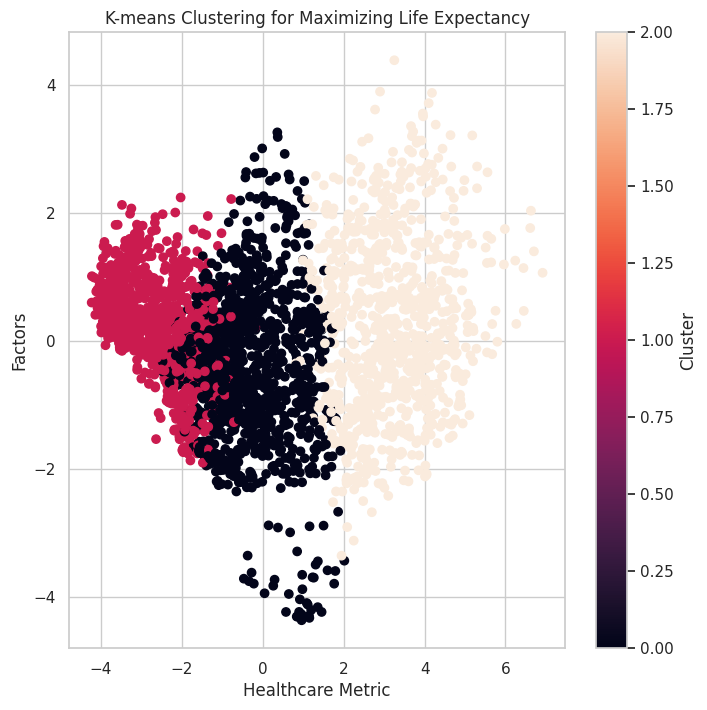

In [ ]:
#life_expectancy_dt
#columns for clustering(first method)
clusteringColumns = ['GDP', 'ADULT_MORTALITY', 'INFANT_DEATHS', 'ALCOHOL', 'MEASLES_', 'PERCENTAGE_EXPENDITURE', 'POLIO', 'DIPHTHERIA_', '_HIV/AIDS', 'POPULATION', 'INCOME_COMPOSITION_OF_RESOURCES', 'SCHOOLING', '_THINNESS__1_19_YEARS', '_THINNESS_5_9_YEARS']

#standarizing the numerical columns
scaler = StandardScaler()
columnstobeScaled = life_expectancy_dt[clusteringColumns].copy()
columnstobeScaled = scaler.fit_transform(columnstobeScaled)

#kmean clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(columnstobeScaled)
clusterLabels = kmeans.labels_

df['Cluster'] = clusterLabels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(columnstobeScaled)

plt.figure(figsize=(8,8))
plt.title('K-means Clustering for Maximizing Life Expectancy')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusterLabels)
plt.xlabel('Healthcare Metric')
plt.ylabel('Factors')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
life_expectancy_dt.count()

COUNTRY                            2938
YEAR                               2938
STATUS                             2938
LIFE_EXPECTANCY_                   2938
ADULT_MORTALITY                    2938
INFANT_DEATHS                      2938
ALCOHOL                            2938
PERCENTAGE_EXPENDITURE             2938
HEPATITIS_B                        2938
MEASLES_                           2938
_BMI_                              2938
UNDER_FIVE_DEATHS_                 2938
POLIO                              2938
TOTAL_EXPENDITURE                  2938
DIPHTHERIA_                        2938
_HIV/AIDS                          2938
GDP                                2938
POPULATION                         2938
_THINNESS__1_19_YEARS              2938
_THINNESS_5_9_YEARS                2938
INCOME_COMPOSITION_OF_RESOURCES    2938
SCHOOLING                          2938
REGION                             2938
LIFESPAN                           2938
dtype: int64

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
#kmeans clustering(second method)
clusteringColumns2 = ['GDP', 'ADULT_MORTALITY', 'INFANT_DEATHS', 'ALCOHOL', 'MEASLES_', 'PERCENTAGE_EXPENDITURE', 'POLIO', 'DIPHTHERIA_', '_HIV/AIDS', 'POPULATION', 'INCOME_COMPOSITION_OF_RESOURCES', 'SCHOOLING', '_THINNESS__1_19_YEARS', '_THINNESS_5_9_YEARS']

clusteringColumns2 , true_labels = make_blobs(n_samples=2938, centers=3, cluster_std=2.75, random_state=42)

#standarizing the numerical columns
scaler = StandardScaler()
columnstobeScaled = scaler.fit_transform(clusteringColumns2)

#kmean clustering
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(columnstobeScaled)

#lowest SSE value
print(kmeans.inertia_)

#locations
print(kmeans.cluster_centers_)

#iterations
print(kmeans.n_iter_)

kmeans.labels_[:5]

1107.4410581670663
[[-0.98623913 -1.16911837]
 [ 1.15165434  0.092294  ]
 [-0.17419247  1.07947505]]
7


array([1, 2, 1, 2, 2], dtype=int32)

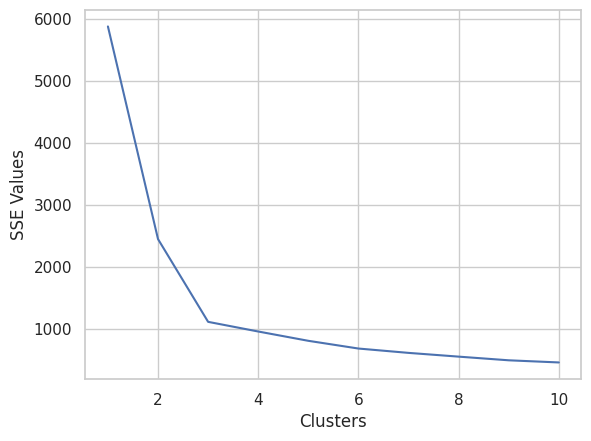

In [ ]:
kmeans_kwargs = { "init" : "random", "n_init" : 10, "max_iter" : 300, "random_state" : 42,}

#list for the SSE values
sseValues = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(columnstobeScaled)
  sseValues.append(kmeans.inertia_)

plt.plot(range(1,11), sseValues)
plt.xlabel("Clusters")
plt.ylabel("SSE Values")
plt.show()

## **Decision Tree Classifier Model**

In [ ]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

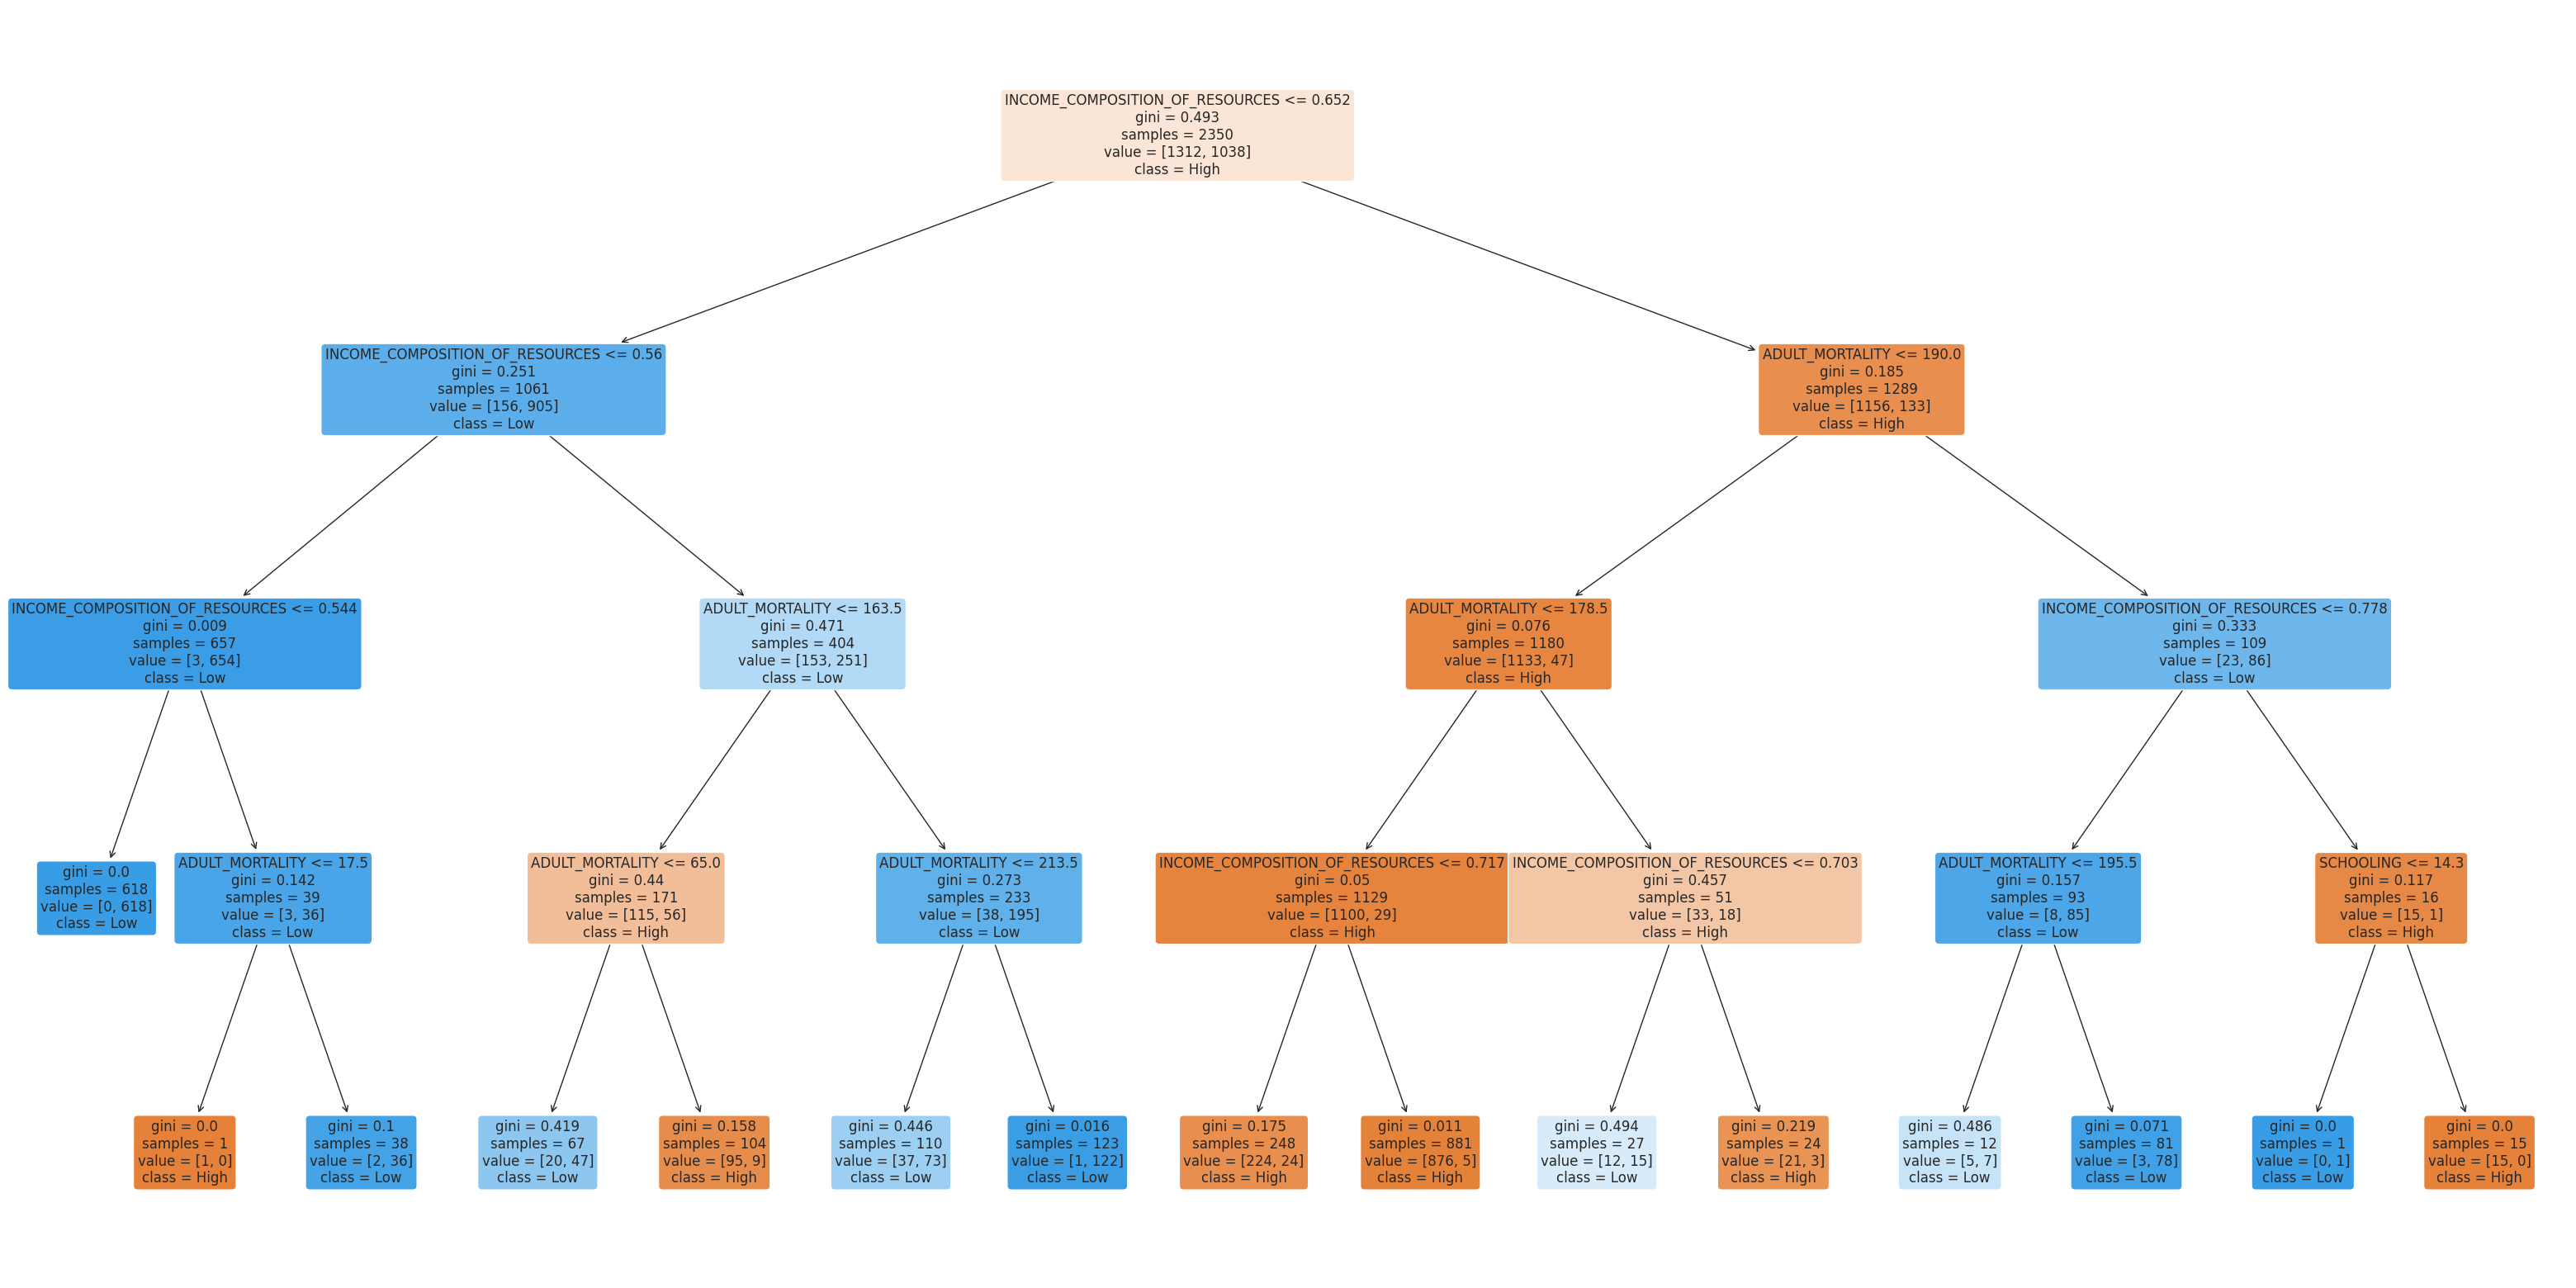

In [ ]:
# Define the features and the target
features = ['INCOME_COMPOSITION_OF_RESOURCES', 'ADULT_MORTALITY', 'SCHOOLING']
target = 'LIFESPAN'

life_expectancy_dt[features] = imputer.fit_transform(life_expectancy_dt[features])

# Preparing the data for the model
X = life_expectancy_dt[features]
y = life_expectancy_dt[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the Decision Tree Classifier
tree_classifier = DecisionTreeClassifier(max_depth=4)

# Train the classifier
tree_classifier.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(40,20))
tree_plot = plot_tree(tree_classifier,
                      feature_names=features,
                      class_names=tree_classifier.classes_,
                      filled=True,
                      rounded=True,
                      fontsize=12)
plt.show()

*INCOME_COMPOSITION_OF_RESOURCES* was the first predictor variable to appear at the top of the classification tree. Hence it is deemed as the most important variable in predicting the lifespan.

Going down the decision tree, *ADULT_MORTALITY* was the next variable used to split the data set at the 2nd level of the tree.

*SCHOOLING* was the 3rd variable to be used to split the tree at the 4th level.

Order of importance
1. INCOME_COMPOSITION_OF_RESOURCES
2. ADULT_MORTALITY
3. SCHOOLING



In [ ]:
# declaration of variables for the following classification trees
lifespan = pd.DataFrame(life_expectancy_dt['LIFESPAN'])                       # Response
income = pd.DataFrame(life_expectancy_dt['INCOME_COMPOSITION_OF_RESOURCES'])  # Predictor 1
mortality = pd.DataFrame(life_expectancy_dt['ADULT_MORTALITY'])               # Predictor 2
school = pd.DataFrame(life_expectancy_dt['SCHOOLING'])                        # Predictor 3

[Text(0.5, 0.875, 'Income <= 0.639\ngini = 0.492\nsamples = 2350\nvalue = [1321, 1029]\nclass = Low'),
 Text(0.25, 0.625, 'Income <= 0.56\ngini = 0.233\nsamples = 1008\nvalue = [136, 872]\nclass = High'),
 Text(0.125, 0.375, 'Income <= 0.544\ngini = 0.009\nsamples = 643\nvalue = [3, 640]\nclass = High'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 608\nvalue = [0, 608]\nclass = High'),
 Text(0.1875, 0.125, 'gini = 0.157\nsamples = 35\nvalue = [3, 32]\nclass = High'),
 Text(0.375, 0.375, 'Income <= 0.562\ngini = 0.463\nsamples = 365\nvalue = [133, 232]\nclass = High'),
 Text(0.3125, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = Low'),
 Text(0.4375, 0.125, 'gini = 0.46\nsamples = 360\nvalue = [129, 231]\nclass = High'),
 Text(0.75, 0.625, 'Income <= 0.701\ngini = 0.207\nsamples = 1342\nvalue = [1185, 157]\nclass = Low'),
 Text(0.625, 0.375, 'Income <= 0.662\ngini = 0.455\nsamples = 300\nvalue = [195, 105]\nclass = Low'),
 Text(0.5625, 0.125, 'gini = 0.494\nsamples = 88\nvalue

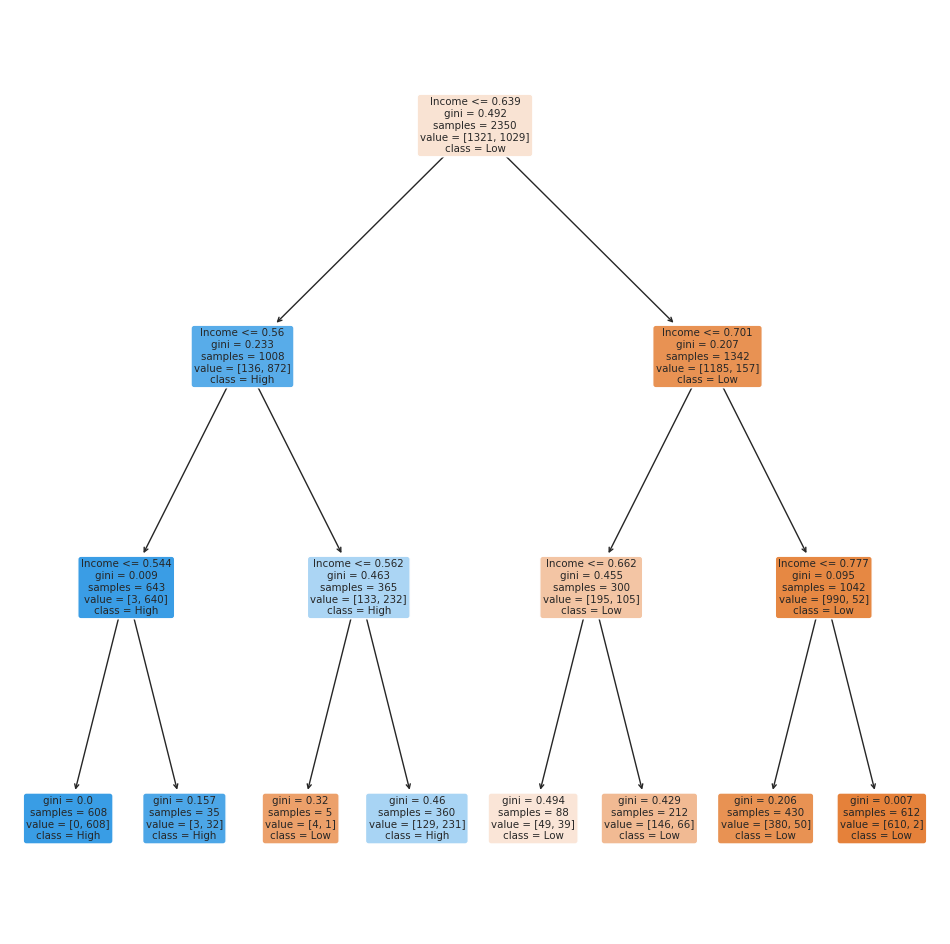

In [ ]:
# Split the Dataset into Train and Test
income_train, income_test, lifespan_train, lifespan_test = train_test_split(income, lifespan, test_size = 0.2)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

# Train the Decision Tree Classifier model
dectree.fit(income_train, lifespan_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=["Income"],
          class_names=["Low","High"])

In [ ]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

# Train the Decision Tree Classifier model
dectree.fit(income_test, lifespan_test)

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=["Income"],
          class_names=["Low","High"])

[Text(0.4230769230769231, 0.875, 'Income <= 0.64\ngini = 0.498\nsamples = 588\nvalue = [313, 275]\nclass = Low'),
 Text(0.15384615384615385, 0.625, 'Income <= 0.556\ngini = 0.179\nsamples = 262\nvalue = [26, 236]\nclass = High'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 168\nvalue = [0, 168]\nclass = High'),
 Text(0.23076923076923078, 0.375, 'Income <= 0.605\ngini = 0.4\nsamples = 94\nvalue = [26, 68]\nclass = High'),
 Text(0.15384615384615385, 0.125, 'gini = 0.48\nsamples = 30\nvalue = [12, 18]\nclass = High'),
 Text(0.3076923076923077, 0.125, 'gini = 0.342\nsamples = 64\nvalue = [14, 50]\nclass = High'),
 Text(0.6923076923076923, 0.625, 'Income <= 0.736\ngini = 0.211\nsamples = 326\nvalue = [287, 39]\nclass = Low'),
 Text(0.5384615384615384, 0.375, 'Income <= 0.711\ngini = 0.402\nsamples = 129\nvalue = [93, 36]\nclass = Low'),
 Text(0.46153846153846156, 0.125, 'gini = 0.428\nsamples = 87\nvalue = [60, 27]\nclass = Low'),
 Text(0.6153846153846154, 0.125, 'gini = 0.337\

In [ ]:
# Predict Response corresponding to Predictors
lifespan_train_pred_1 = dectree.predict(income_train)
lifespan_test_pred_1 = dectree.predict(income_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(income_train, lifespan_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(income_test, lifespan_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
cm_train_1 = confusion_matrix(lifespan_train, lifespan_train_pred_1)
sns.heatmap(cm_train_1,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
cm_test_1 = confusion_matrix(lifespan_test, lifespan_test_pred_1)
sns.heatmap(cm_test_1,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#Print the TPR and FPR for train set
print ()
FP_tr_1 = cm_train_1[0][1]
FN_tr_1 = cm_train_1[1][0]
TP_tr_1 = cm_train_1[1][1]
TN_tr_1 = cm_train_1[0][0]
print("For train set")
print("The True Positive Rate of trian set for this model \t:", TP_tr_1/(FN_tr_1 + TP_tr_1))
print("The False Positive Rate of train set for this model \t:", FP_tr_1/(TN_tr_1 + FP_tr_1))


#Print the TPR and FPR for test set
print()
FP_tt_1 = cm_test_1[0][1]
FN_tt_1 = cm_test_1[1][0]
TP_tt_1 = cm_test_1[1][1]
TN_tt_1 = cm_test_1[0][0]
print("For test set")
print("The True Positive Rate of test set for this model \t:", TP_tt_1/(FN_tt_1 + TP_tt_1))
print("The False Positive Rate of test set for this model \t:", FP_tt_1/(TN_tt_1 + FP_tt_1))

In [ ]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Train the Decision Tree Classifier model
dectree.fit(income_train, lifespan_train)

f = plt.figure(figsize=(16,16))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=["Income"],
          class_names=["Low","High"])

In [ ]:
# Split the Dataset into Train and Test
mortality_train, mortality_test, lifespan_train, lifespan_test = train_test_split(mortality, lifespan, test_size = 0.2)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

# Train the Decision Tree Classifier model
dectree.fit(mortality_train, lifespan_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=["Adult_Mortality"],
          class_names=["Low","High"])

In [ ]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

# Train the Decision Tree Classifier model
dectree.fit(mortality_test, lifespan_test)

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=["Adult_Mortality"],
          class_names=["Low","High"])

In [ ]:
# Predict Response corresponding to Predictors
lifespan_train_pred_2 = dectree.predict(mortality_train)
lifespan_test_pred_2 = dectree.predict(mortality_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(mortality_train, lifespan_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(mortality_test, lifespan_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
cm_train_2 = confusion_matrix(lifespan_train, lifespan_train_pred_2)
sns.heatmap(cm_train_2,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
cm_test_2 = confusion_matrix(lifespan_test, lifespan_test_pred_2)
sns.heatmap(cm_test_2,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#Print the TPR and FPR for train set
print ()
FP_tr_2 = cm_train_2[0][1]
FN_tr_2 = cm_train_2[1][0]
TP_tr_2 = cm_train_2[1][1]
TN_tr_2 = cm_train_2[0][0]
print("For train set")
print("The True Positive Rate of trian set for this model \t:", TP_tr_2/(FN_tr_2 + TP_tr_2))
print("The False Positive Rate of train set for this model \t:", FP_tr_2/(TN_tr_2 + FP_tr_2))


#Print the TPR and FPR for test set
print()
FP_tt_2 = cm_test_2[0][1]
FN_tt_2 = cm_test_2[1][0]
TP_tt_2 = cm_test_2[1][1]
TN_tt_2 = cm_test_2[0][0]
print("For test set")
print("The True Positive Rate of test set for this model \t:", TP_tt_2/(FN_tt_2 + TP_tt_2))
print("The False Positive Rate of test set for this model \t:", FP_tt_2/(TN_tt_2 + FP_tt_2))

In [ ]:
# Split the Dataset into Train and Test
school_train, school_test, lifespan_train, lifespan_test = train_test_split(school, lifespan, test_size = 0.2)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

# Train the Decision Tree Classifier model
dectree.fit(school_train, lifespan_train)

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=["Schooling"],
          class_names=["Low","High"])

In [ ]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 3)

# Train the Decision Tree Classifier model
dectree.fit(school_test, lifespan_test)

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True,
          feature_names=["Adult_Mortality"],
          class_names=["Low","High"])

In [ ]:
# Predict Response corresponding to Predictors
lifespan_train_pred_3 = dectree.predict(school_train)
lifespan_test_pred_3 = dectree.predict(school_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(school_train, lifespan_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(school_test, lifespan_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
cm_train_3 = confusion_matrix(lifespan_train, lifespan_train_pred_3)
sns.heatmap(cm_train_3,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
cm_test_3 = confusion_matrix(lifespan_test, lifespan_test_pred_3)
sns.heatmap(cm_test_3,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

#Print the TPR and FPR for train set
print ()
FP_tr_3 = cm_train_3[0][1]
FN_tr_3 = cm_train_3[1][0]
TP_tr_3 = cm_train_3[1][1]
TN_tr_3 = cm_train_3[0][0]
print("For train set")
print("The True Positive Rate of trian set for this model \t:", TP_tr_3/(FN_tr_3 + TP_tr_3))
print("The False Positive Rate of train set for this model \t:", FP_tr_3/(TN_tr_3 + FP_tr_3))


#Print the TPR and FPR for test set
print()
FP_tt_3 = cm_test_3[0][1]
FN_tt_3 = cm_test_3[1][0]
TP_tt_3 = cm_test_3[1][1]
TN_tt_3 = cm_test_3[0][0]
print("For test set")
print("The True Positive Rate of test set for this model \t:", TP_tt_3/(FN_tt_3 + TP_tt_3))
print("The False Positive Rate of test set for this model \t:", FP_tt_3/(TN_tt_3 + FP_tt_3))

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Correct the feature names to match the dataframe
features = ['SCHOOLING', 'INCOME_COMPOSITION_OF_RESOURCES', 'ADULT_MORTALITY', '_BMI_', 'GDP']
target = 'LIFE_EXPECTANCY_'

# Impute the missing values using the mean for each column (features + target)
#imputer = SimpleImputer(strategy='mean')
#life_expectancy_dt[features] = imputer.fit_transform(life_expectancy_dt[features])
#life_expectancy_dt[target] = imputer.fit_transform(life_expectancy_dt[[target]]).ravel()

# Split the data into training and testing sets
X = life_expectancy_dt[features]
y = life_expectancy_dt[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the Decision Tree Regressor with a maximum depth of 3
tree_regressor = DecisionTreeRegressor(max_depth=3)

# Train the model on the imputed dataset
tree_regressor.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, feature_names=features, filled=True, rounded=True, fontsize=12)
plt.show()


# **Random Forest Regressor**

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [ ]:
#life_expectancy_dt, schooling
lifeExpectancy = pd.DataFrame(life_expectancy_dt['LIFE_EXPECTANCY_'])  # Response
schooling = pd.DataFrame(life_expectancy_dt['SCHOOLING'])        # Predictor

#Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(schooling, lifeExpectancy, test_size = 0.2, random_state=42)

#Creation of Random Forest Regressor
randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)

#Ravel y_train to avoid warnings
randomForestRegressor.fit(X_train, y_train.values.ravel())

predictions = randomForestRegressor.predict(X_test)

#Calculate Mean Squared Error(MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Choose a tree from the forest
tree_forest = randomForestRegressor.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_forest, feature_names=schooling.columns, filled=True)
plt.show()

In [ ]:
#life_expectancy_dt, income_composition_of_resources
lifeExpectancy = pd.DataFrame(life_expectancy_dt['LIFE_EXPECTANCY_'])  # Response
schooling = pd.DataFrame(life_expectancy_dt['INCOME_COMPOSITION_OF_RESOURCES'])        # Predictor

#Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(schooling, lifeExpectancy, test_size = 0.2, random_state=42)

#Creation of Random Forest Regressor
randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)

#Ravel y_train to avoid warnings
randomForestRegressor.fit(X_train, y_train.values.ravel())

predictions = randomForestRegressor.predict(X_test)

#Calculate Mean Squared Error(MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Choose a tree from the forest
tree_forest = randomForestRegressor.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_forest, feature_names=schooling.columns, filled=True)
plt.show()

In [ ]:
#life_expectancy_dt, adult_mortality
lifeExpectancy = pd.DataFrame(life_expectancy_dt['LIFE_EXPECTANCY_'])  # Response
schooling = pd.DataFrame(life_expectancy_dt['ADULT_MORTALITY'])        # Predictor

#Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(schooling, lifeExpectancy, test_size = 0.2, random_state=42)

#Creation of Random Forest Regressor
randomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=42)

#Ravel y_train to avoid warnings
randomForestRegressor.fit(X_train, y_train.values.ravel())

predictions = randomForestRegressor.predict(X_test)

#Calculate Mean Squared Error(MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

# Choose a tree from the forest
tree_forest = randomForestRegressor.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_forest, feature_names=schooling.columns, filled=True)
plt.show()

# **Life Expectancy Prediction (xgboost XGBRegressor)**

---



In [ ]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from xgboost import XGBRegressor

# Load the data
# split data into input and output columns
X = life_expectancy_dt[["SCHOOLING", "INCOME_COMPOSITION_OF_RESOURCES", "ADULT_MORTALITY", "DIPHTHERIA_", "_BMI_", "GDP"]]
y = life_expectancy_dt["LIFE_EXPECTANCY_"]

# Splitting
train_X, test_X, train_y, test_y = train_test_split(X, y,
                      test_size = 0.2, random_state = 42)

# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 42)

# Fitting the model
xgb_r.fit(train_X, train_y)

# Predict the model
pred = xgb_r.predict(test_X)

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, test_y, pred, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute
from xgboost import XGBRegressor

# split data into input and output columns
X = life_expectancy_dt[["SCHOOLING", "INCOME_COMPOSITION_OF_RESOURCES", "ALCOHOL", "DIPHTHERIA_", "_BMI_", "POLIO"]]
y = life_expectancy_dt["LIFE_EXPECTANCY_"]
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

In [ ]:
from numpy import asarray
# split dataset into input and output columns
X = life_expectancy_dt[["SCHOOLING", "INCOME_COMPOSITION_OF_RESOURCES", "GDP", "DIPHTHERIA_", "_BMI_", "POLIO"]]
y = life_expectancy_dt["LIFE_EXPECTANCY_"]
# define model
model = XGBRegressor()
# fit model
model.fit(X, y)
# define new data
row = [2000.00,2000.00, 2000.00,2000.00,2000.00,2000.00]
new_data = asarray([row])
# make a prediction
age_prediction = model.predict(new_data)
# summarize prediction
print('Predicted age for input: %.3f' % age_prediction)